## Analysis of Election Data

We will analyze the data of 2012 election. We will analyze the results of the political polls, aggregated poll data and also on the voter's sentiment data.

In [18]:
#importing the libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#setting a white background for visualiztion
sns.set_style('whitegrid')

#command to display charts on juypter notebooks.
%matplotlib inline

##### Request module

Requests will allow you to send HTTP/1.1 requests using Python. With it, you can add content like headers, form data, multipart files, and parameters via simple Python libraries. It also allows you to access the response data of Python in the same way.This library intends to make parsing HTML (e.g. scraping the web) as simple and intuitive as possible.

In [2]:
#install requests module
!pip install requests

##### StringIO module
StringIO provides a convenient means of working with text in memory using the file API.It's used when you have some API that only takes files, but you need to use a string

In [5]:
!pip install StringIO


  Could not find a version that satisfies the requirement StringIO (from versions: )
No matching distribution found for StringIO


In [7]:

# Use to grab data from the web
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [8]:

# below is the link in csv format
data_url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# using requests to read data from the link
data_source = requests.get(data_url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(data_source)

The data in csv format is converted to data frame, so it's easily to perform analysis on the data.

In [12]:
# creating a new datafram
poll_df = pd.read_csv(poll_data)

# Let's get a glimpse at the data
#poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [13]:
# previewing the data
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [14]:
# runnig some descriptive stats on data
poll_df.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


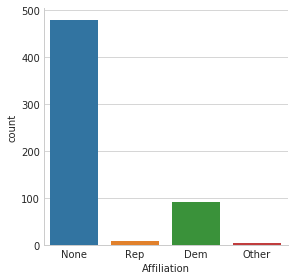

In [20]:
# plotting factorplot for 'Affiliation'
sns.factorplot('Affiliation',data=poll_df,kind='count')

We can notice that majority of affiliation of the polling data is "NONE". That is majority of data is neutral (not biased with any particular affiliation). We can also see there's considerable count of democrats affiliation.

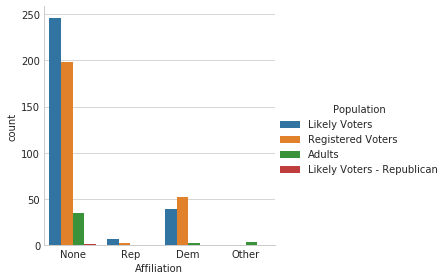

In [22]:
#factor plot on affiliation with population as hue
# Factorplot the affiliation by Population
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

#### Data Description
LIKELY VOTERS- voters with higher chance that they will vote in elections
REGISTERED VOTERS- voters who have registered for the election
ADULTS- No of adults in the data
LIKELY VOTERS_ REPUBLICAN- voters who are more  likely to vote for republic

We can see that likely_voters and registered_voters are the majority in NOne affilation. It is also the same with democrats affilaition

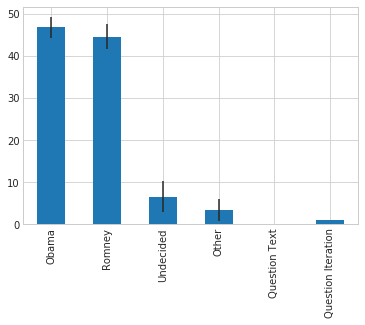

In [23]:
# we'll get the average
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)

# calculating the standard deviation
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

We will concatenate the average, standard deviations of Obama, Romney and Undecided.

In [29]:
poll_avg = pd.concat([avg,std],axis=1)

#Rename columns
poll_avg.columns = ['Average','STD']

#Showing the avg and SD
poll_avg=poll_avg.iloc[0:3,:]
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


Time series analysis of Obama and Romney's voters sentient versus POll end dates

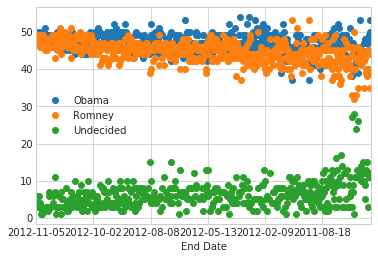

In [34]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')


We can notice that as days progress, the undeicided voters have decreased (probably they  have decided to whom they should vote for). The voters of republics and democrats have also increased over time.

In [35]:
# for the sake of timestamps.
from datetime import datetime

In [36]:

# calculating teh difference Obama and Romney and adding them to a new column.
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
# Preview the new column
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


We have calculated the percentage of difference of voters between Obama and Romney. If the difference value is positive, we can assume that Obama leads Romney. If the difference value is negative, Romney leads Obama.

We will create aggregate of voter counts for Obama and Romney using groupby() function.

In [37]:

#We will  calculate the mean of polls on that particukar day
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


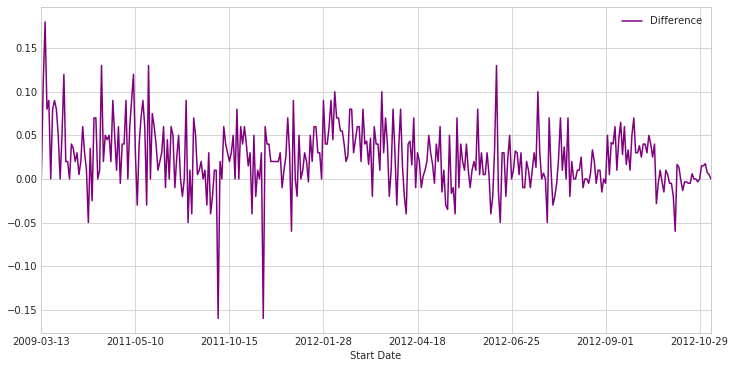

In [42]:
# Plotting the difference in polls between Obama and Romney
fig = poll_df.plot('Start Date','Difference',figsize=(12,6),color='purple')

We can zoom in to the month of October to perform time-series analysis of the poll data.

For this, we will be creating a 'for' function to loop through the index and print out the index of start and end date of October.

In [47]:

# Set row count and xlimit list
row_in = 0
xlimit = []

# for loop for printing the  index of october:
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1        
print(min(xlimit))
print (max(xlimit))

325
352


We will create markers on the days of debate to study the polling trends.


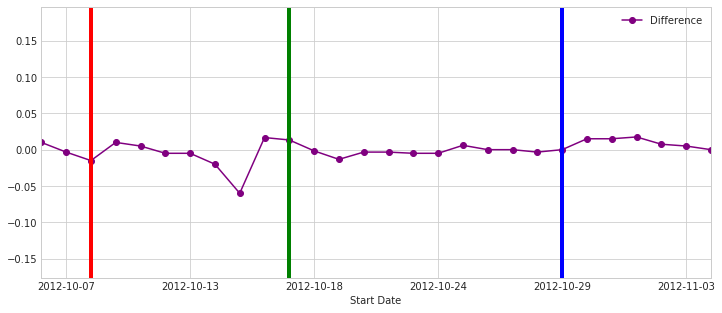

In [53]:

# plotting the line graph
fig = poll_df.plot('Start Date','Difference',figsize=(12,5),marker='o',linestyle='-',color='purple',xlim=(329,356))

# Now add the debate markers
plt.axvline(x=329+2, linewidth=4, color='red')
plt.axvline(x=329+10, linewidth=4, color='green')
plt.axvline(x=329+21, linewidth=4, color='blue')

After the first debate, Obama seems to lead the polling results. For the second debate, Romney leads the results.
BY this data, we can conclude that every other factor affect the polling results . Like for example  the location is a strong player in polling.

### DONOR DATA SET
We will analyze the datasets of donors who supported the political parties. We can calculate the distribution of donations across the political parties and examine a trend or  linear relationship  between the donations recieved and polls won.

In [56]:

# reading the csv file
donor_data = pd.read_csv('Election_Donor_Data.csv')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
donor_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-Jun-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,1-Aug-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166


In [58]:
#descriptive stats of donor data
donor_data.describe()

,contb_receipt_amt,file_num
count,5.017290e+05,501729.000000
mean,3.548661e+02,774544.458724
std,5.267355e+03,10647.234992
min,-3.080000e+04,736166.000000
25%,3.500000e+01,771927.000000
50%,1.000000e+02,775668.000000
75%,2.500000e+02,785239.000000
max,2.014491e+06,787803.000000


In [59]:
#info abt the data
donor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501729 entries, 0 to 501728
Data columns (total 16 columns):
cmte_id              501729 non-null object
cand_id              501729 non-null object
cand_nm              501729 non-null object
contbr_nm            501729 non-null object
contbr_city          501722 non-null object
contbr_st            501725 non-null object
contbr_zip           501681 non-null object
contbr_employer      497681 non-null object
contbr_occupation    497646 non-null object
contb_receipt_amt    501729 non-null float64
contb_receipt_dt     501729 non-null object
receipt_desc         6886 non-null object
memo_cd              61509 non-null object
memo_text            64696 non-null object
form_tp              501729 non-null object
file_num             501729 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 61.2+ MB


In [60]:
# distribution of donor amounts
donor_data['contb_receipt_amt'].value_counts()


 100.00     77567
 50.00      64329
 25.00      53454
 250.00     42460
 2500.00    32663
 500.00     30198
 35.00      23301
 1000.00    21671
 10.00      21338
 200.00     14418
 20.00      10857
 15.00      10039
 150.00      8044
 75.00       7374
 30.00       6262
 5.00        5728
 300.00      5487
 40.00       2760
 2000.00     2615
 55.00       2587
 1500.00     2531
 3.00        2498
 60.00       1995
 110.00      1789
 19.00       1658
 400.00      1600
 112.00      1574
 212.00      1451
 125.00      1114
 11.00       1073
            ...  
 393.00         1
-715.00         1
 492.50         1
 501.11         1
 387.50         1
 37.20          1
-1539.00        1
-940.00         1
 770.00         1
 3085.00        1
 1196.60        1
-148.67         1
-235.40         1
-93.00          1
 45.76          1
 225.50         1
-309.00         1
 855.00         1
 54.63          1
-995.00         1
 941.65         1
 20.41          1
 199.12         1
 1553.00        1
-2050.00  

In [61]:

# calculating mean
donor_mean = donor_data['contb_receipt_amt'].mean()

# Get the std of the donation
donor_std = donor_data['contb_receipt_amt'].std()

print ('The average donation was %.2f with a std of %.2f' %(donor_mean,donor_std))

The average donation was 354.87 with a std of 5267.36


We have noticed a huge standar deviation.It is reqiured to dive deep into data and spot the outliers

In [65]:
# creatinga new df
top_donor = donor_data['contb_receipt_amt'].copy()

# Now sort it
top_donor.sort_values()

# Then check the Series
top_donor

0          250.0
1           50.0
2          250.0
3          250.0
4          300.0
5          500.0
6          250.0
7          250.0
8          250.0
9          250.0
10         250.0
11         500.0
12         250.0
13         250.0
14         250.0
15         300.0
16         500.0
17        1000.0
18         250.0
19         300.0
20         500.0
21         250.0
22        2500.0
23        2500.0
24         150.0
25         200.0
26         100.0
27         250.0
28         500.0
29         250.0
           ...  
501699      50.0
501700      50.0
501701      10.0
501702      75.0
501703     100.0
501704      10.0
501705     100.0
501706     100.0
501707     100.0
501708     100.0
501709      25.0
501710     150.0
501711      25.0
501712      55.0
501713     100.0
501714    1000.0
501715     100.0
501716     150.0
501717     500.0
501718     100.0
501719     250.0
501720     250.0
501721     250.0
501722     500.0
501723     500.0
501724      25.0
501725      50.0
501726      25

The negative values are due to the FEC recording refunds as well as donations. SO we will get rid of the negative values.


In [68]:

top_donor = top_donor[top_donor >0]

# Sort the Series
top_donor.sort_values()

# Look at the top 10 most common donations value counts
top_donor.value_counts().head(10)

100.0     77567
50.0      64329
25.0      53454
250.0     42460
2500.0    32663
500.0     30198
35.0      23301
1000.0    21671
10.0      21338
200.0     14418
Name: contb_receipt_amt, dtype: int64

The maximum donations are in the form of whole rounded numbers and maximum denominations is 100$ bill.

PLotting an histogram on the distribution of donors.

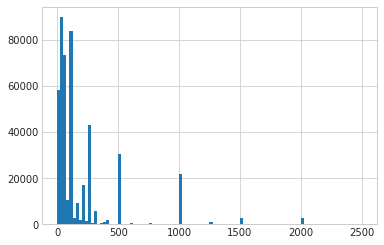

In [71]:

common_donors = top_donor[top_donor < 2500]

# Set a high number of bins to account for the non-round donations and check histogram for spikes.
common_donors.hist(bins=100)

We can see spikes at round numbers meaning people tend to donate more in round numbers

We will see the contribution of the donors  party wise.

In [73]:

# unique candidates
candidates = donor_data.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack'],
      dtype=object)

In [76]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_data['Party'] = donor_data.cand_nm.map(party_map)

We are using a dictionary called party_map to categorise the candidates according to their party affiliations.

In [79]:
donor_data = donor_data[donor_data.contb_receipt_amt >0]

donor_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-Jun-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,1-Aug-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166,Republican


Lets see how much each cacndidates have raised for their electiton campaign

In [80]:
donor_data.groupby('cand_nm')['contb_receipt_amt'].count()


cand_nm
Bachmann, Michelle       409
Obama, Barack         390947
Romney, Mitt          105155
Name: contb_receipt_amt, dtype: int64

In [81]:
# calculating the total sum they raised
donor_data.groupby('cand_nm')['contb_receipt_amt'].sum()


cand_nm
Bachmann, Michelle      177668.00
Obama, Barack         94328867.06
Romney, Mitt          88335907.53
Name: contb_receipt_amt, dtype: float64

IT will be cool to print in a more coversational way rather than just nuumbers

In [85]:
cand_amount = donor_data.groupby('cand_nm')['contb_receipt_amt'].sum()

# Our index tracker
i = 0

for don in cand_amount:
    print( " The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print ('\n')
    i += 1

 The candidate Bachmann, Michelle raised 177668 dollars 


 The candidate Obama, Barack raised 94328867 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 




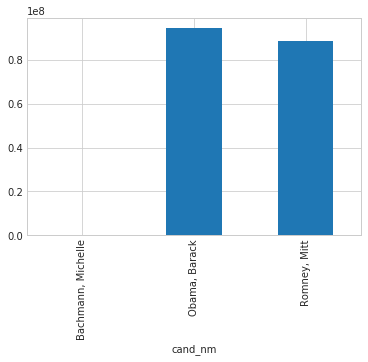

In [89]:
cand_amount.plot(kind='bar')

We can clearly barack obama is a forerunner on raising maximum donations

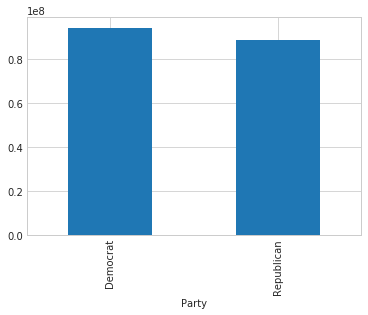

In [90]:
#lets look at the  distribution of domationns among republic and democrats
donor_data.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')


Finally, we will  look the donation distribution across donor's occupation in both the parties. We will use pivot_table function to execute this.

In [92]:
# Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_data.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')
occupation_df

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.00,NaN
RESEARCH ASSOCIATE,100.00,NaN
TEACHER,500.00,NaN
THERAPIST,3900.00,NaN
.NET PROGRAMMER,481.00,NaN
12K ADVOCATE,150.00,NaN
13D,50.00,NaN
1SG RETIRED,210.00,NaN
1ST ASSISTANT DIRECTOR 2ND UNIT,35.00,NaN


We will take the occupations that have donated more than 1 Million dollars

In [93]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,7343964.05,5369018.82
BANKER,150950.00,1009436.24
C.E.O.,1690.00,1968386.11
CEO,1439865.99,358460.92
CHAIRMAN,380697.00,805381.75
CONSULTANT,1747794.15,1426394.01
EXECUTIVE,955217.40,2301447.03
FINANCE,181721.65,1143592.25
HOMEMAKER,2951616.04,8150496.22


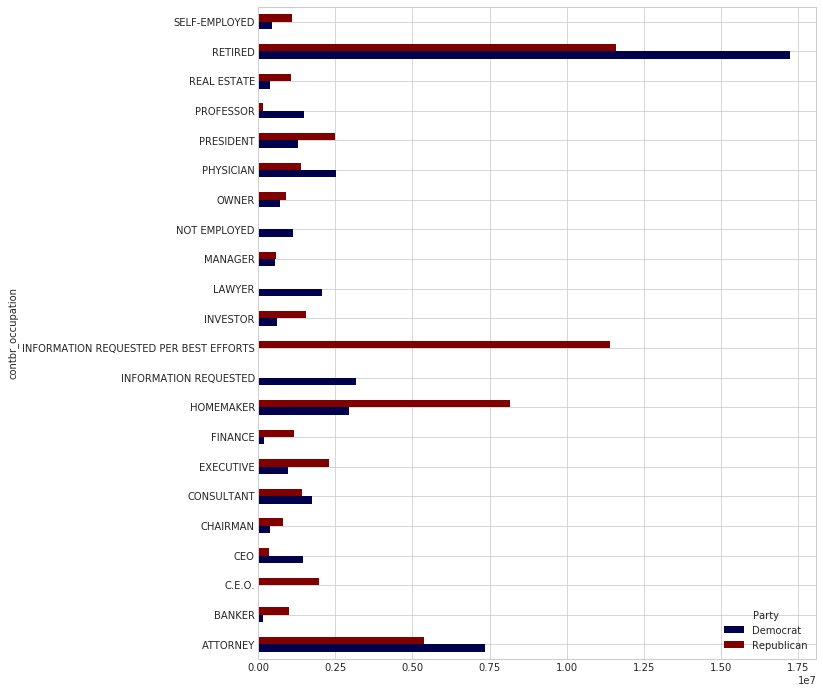

In [95]:
# PLotting a histogram plot on these data:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic',legend=True)


#### Looks like the Professors are more generous than the chairman or the CEOs